In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import sys
module_path = os.path.abspath(os.path.join('/../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

In [5]:
import zipfile

In [20]:
zip_path = "USOS_ZONA_10.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()
    print("Archivos extraídos:", zip_ref.namelist())

Archivos extraídos: ['USOS_ZONA_10/USOS_ZONA_10.cpg', 'USOS_ZONA_10/USOS_ZONA_10.dbf', 'USOS_ZONA_10/USOS_ZONA_10.prj', 'USOS_ZONA_10/USOS_ZONA_10.shp', 'USOS_ZONA_10/USOS_ZONA_10.shx']


In [6]:
zip_path = "USOS_ZONA_7.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()
    print("Archivos extraídos:", zip_ref.namelist())

Archivos extraídos: ['USOS_ZONA_7/USOS_ZONA_7.cpg', 'USOS_ZONA_7/USOS_ZONA_7.dbf', 'USOS_ZONA_7/USOS_ZONA_7.prj', 'USOS_ZONA_7/USOS_ZONA_7.qmd', 'USOS_ZONA_7/USOS_ZONA_7.shp', 'USOS_ZONA_7/USOS_ZONA_7.shx']


In [7]:
zip_path = "USOS_ZONA_6.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()
    print("Archivos extraídos:", zip_ref.namelist())

Archivos extraídos: ['USOS_ZONA_6/USOS_ZONA_6/USOS_ZONA_6.cpg', 'USOS_ZONA_6/USOS_ZONA_6/USOS_ZONA_6.dbf', 'USOS_ZONA_6/USOS_ZONA_6/USOS_ZONA_6.prj', 'USOS_ZONA_6/USOS_ZONA_6/USOS_ZONA_6.qmd', 'USOS_ZONA_6/USOS_ZONA_6/USOS_ZONA_6.shp', 'USOS_ZONA_6/USOS_ZONA_6/USOS_ZONA_6.shx']


## USOS_ZONA_10

In [22]:
USOS_ZONA_10 = gpd.read_file("USOS_ZONA_10.shp")

In [23]:
USOS_ZONA_10.head(5)

,gid,id,distrito,shape_leng,shape_area,UNuso,geometry
0,192554,389404.0,10.0,61.64,237.4392,Habitacional,"POLYGON ((663022.868 2308151.323, 663022.056 2..."
1,192518,389292.0,10.0,61.64,237.4392,Habitacional,"POLYGON ((663015.463 2308050.112, 663020.042 2..."
2,192519,389301.0,10.0,61.64,237.4392,Habitacional,"POLYGON ((662997.969 2308062.806, 663007.629 2..."
3,192546,389427.0,10.0,61.64,237.4392,Habitacional,"POLYGON ((663042.797 2308174.334, 663053.228 2..."
4,192547,389440.0,10.0,61.64,237.4392,Habitacional,"POLYGON ((663004.155 2308180.683, 663014.586 2..."


In [24]:
print(USOS_ZONA_10.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 23765 entries, 0 to 23764
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   gid         23765 non-null  int64   
 1   id          23765 non-null  float64 
 2   distrito    23765 non-null  float64 
 3   shape_leng  23765 non-null  float64 
 4   shape_area  23765 non-null  float64 
 5   UNuso       23631 non-null  object  
 6   geometry    23765 non-null  geometry
dtypes: float64(4), geometry(1), int64(1), object(1)
memory usage: 1.3+ MB
None


In [26]:
print(USOS_ZONA_10.isnull().sum())  # Para ver valores nulos

gid             0
id              0
distrito        0
shape_leng      0
shape_area      0
UNuso         134
geometry        0
dtype: int64


### Análisis con base en el tipo de suelo

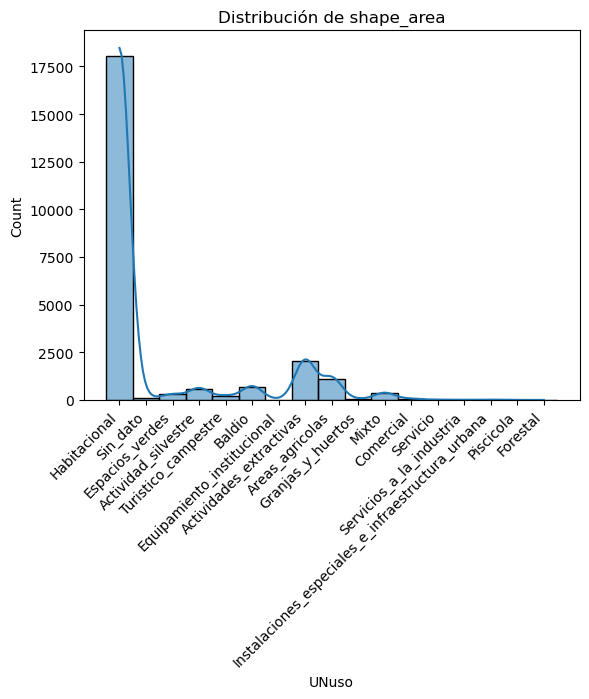

In [31]:
# Histograma de UNuso
sns.histplot(USOS_ZONA_10["UNuso"], bins=30, kde=True)
plt.xticks(rotation=45, ha='right')
plt.title("Distribución de shape_area")
plt.show()

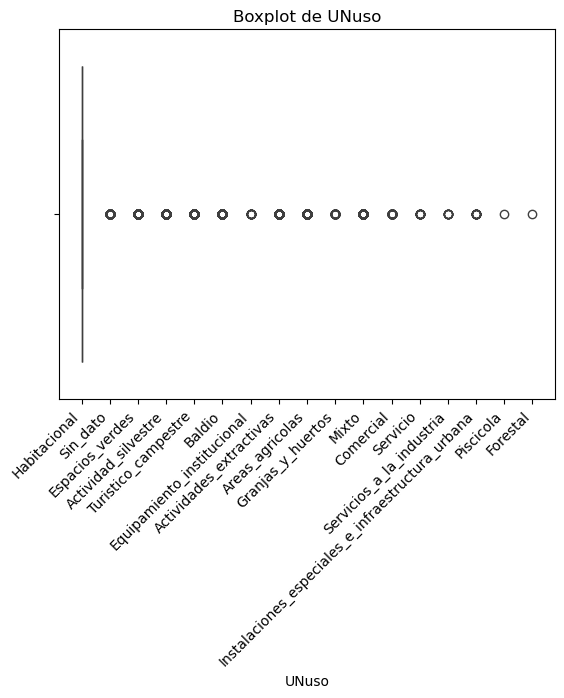

In [32]:
# Boxplot para detectar valores atípicos en las UNuso
sns.boxplot(x=USOS_ZONA_10["UNuso"])
plt.xticks(rotation=45, ha='right')
plt.title("Boxplot de UNuso")
plt.show()

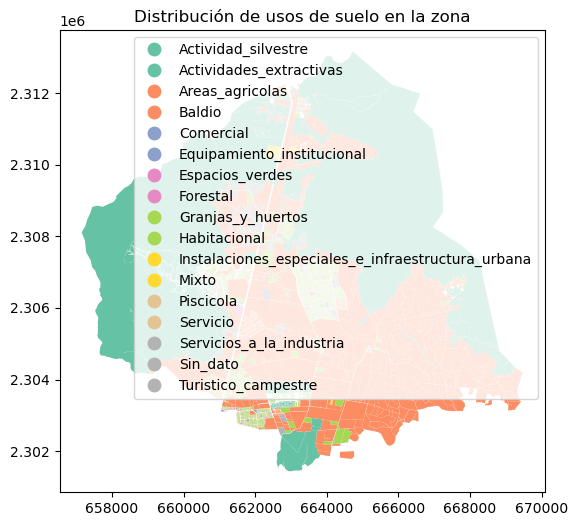

In [28]:
# Graficar los polígonos
USOS_ZONA_10.plot(column="UNuso", legend=True, cmap="Set2", figsize=(10, 6))
plt.title("Distribución de usos de suelo en la zona")
plt.show()

### Análisis con base en las áreas

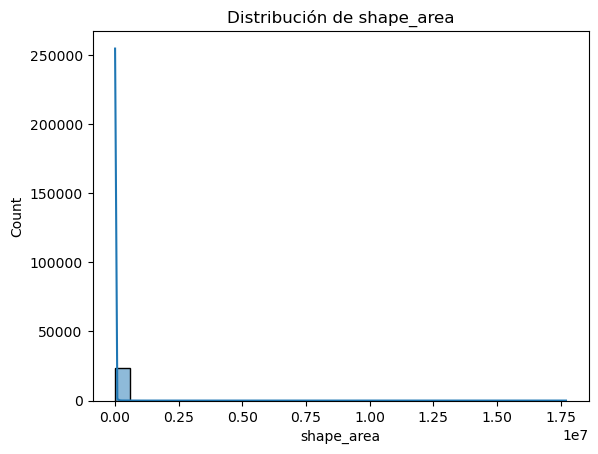

In [33]:
# Histograma de áreas
sns.histplot(USOS_ZONA_10["shape_area"], bins=30, kde=True)
plt.title("Distribución de shape_area")
plt.show()

In [35]:
print(USOS_ZONA_10["shape_area"].describe())

count    2.376500e+04
mean     3.524487e+03
std      1.617359e+05
min      0.000000e+00
25%      6.887999e+01
50%      7.318549e+01
75%      1.919998e+02
max      1.771519e+07
Name: shape_area, dtype: float64


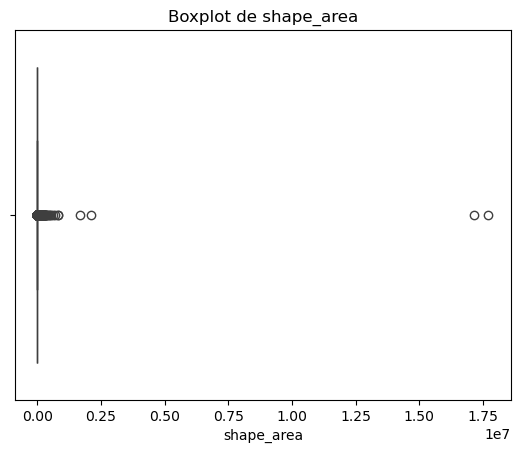

In [34]:
# Boxplot para detectar valores atípicos en las áreas
sns.boxplot(x=USOS_ZONA_10["shape_area"])
plt.title("Boxplot de shape_area")
plt.show()

## USOS_ZONA_7

In [11]:
USOS_ZONA_7 = gpd.read_file("USOS_ZONA_7.shp")

In [12]:
USOS_ZONA_7.head(3)

,gid,id,distrito,shape_leng,shape_area,UNuso,geometry
0,310258,292227.0,9.0,864.514036,43286.987436,Baldio,"POLYGON ((661024.605 2285921.619, 661026.262 2..."
1,373566,292227.0,7.0,0.000000,0.000000,Baldio,"POLYGON ((661024.605 2285921.619, 661026.262 2..."
2,310259,292238.0,9.0,1845.251165,169731.594067,Baldio,"POLYGON ((661211.371 2286270.951, 661231.736 2..."


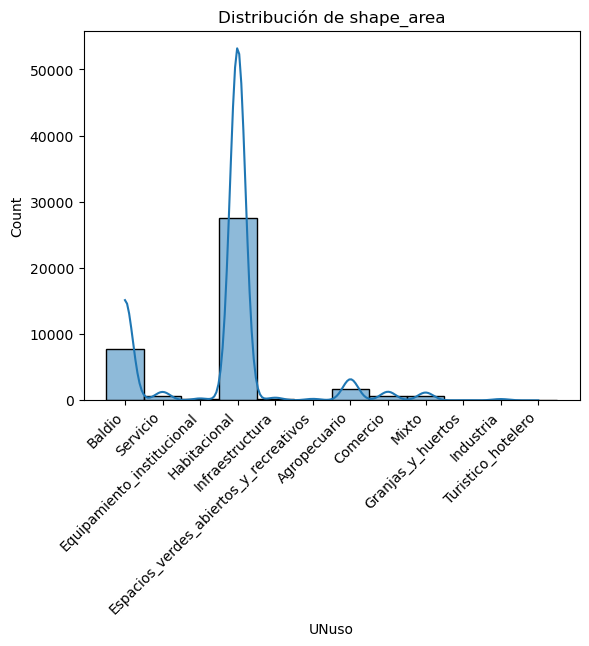

In [14]:
# Histograma de UNuso
sns.histplot(USOS_ZONA_7["UNuso"], bins=30, kde=True)
plt.xticks(rotation=45, ha='right')
plt.title("Distribución de shape_area")
plt.show()

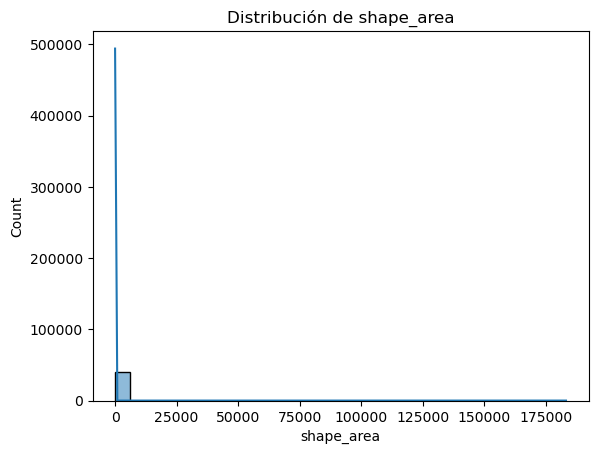

In [16]:
# Histograma de áreas
sns.histplot(USOS_ZONA_7["shape_area"], bins=30, kde=True)
plt.title("Distribución de shape_area")
plt.show()

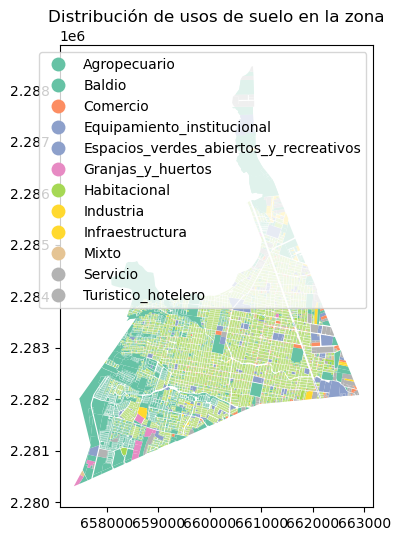

In [15]:
# Graficar los polígonos
USOS_ZONA_7.plot(column="UNuso", legend=True, cmap="Set2", figsize=(10, 6))
plt.title("Distribución de usos de suelo en la zona")
plt.show()

## USOS_ZONA_6

In [18]:
USOS_ZONA_6 = gpd.read_file("USOS_ZONA_6.shp")

In [19]:
USOS_ZONA_6.head(3)

,gid,id,distrito,shape_leng,shape_area,UNUSO,geometry
0,428493,0.0,6.0,80.163160,401.281414,Industria,"POLYGON ((663857.986 2280510.724, 663849.860 2..."
1,428494,0.0,6.0,45.215891,127.314032,Habitacional,"POLYGON ((664969.069 2280510.913, 664959.087 2..."
2,428464,0.0,6.0,51.600415,133.906589,Habitacional,"POLYGON ((663037.303 2282487.999, 663033.794 2..."


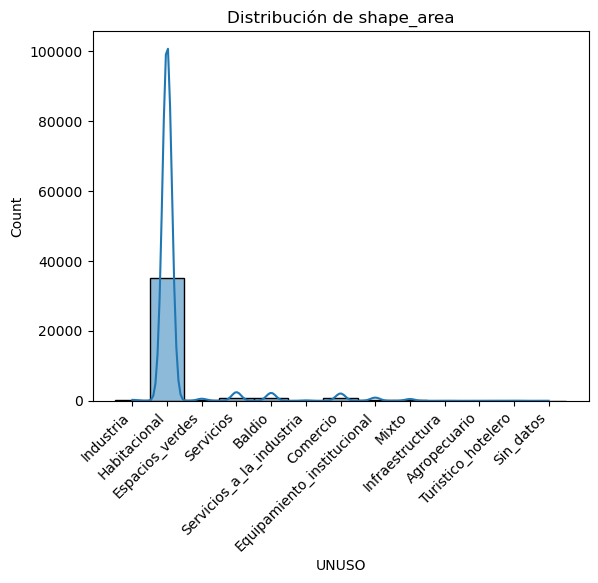

In [21]:
# Histograma de UNuso
sns.histplot(USOS_ZONA_6["UNUSO"], bins=30, kde=True)
plt.xticks(rotation=45, ha='right')
plt.title("Distribución de shape_area")
plt.show()

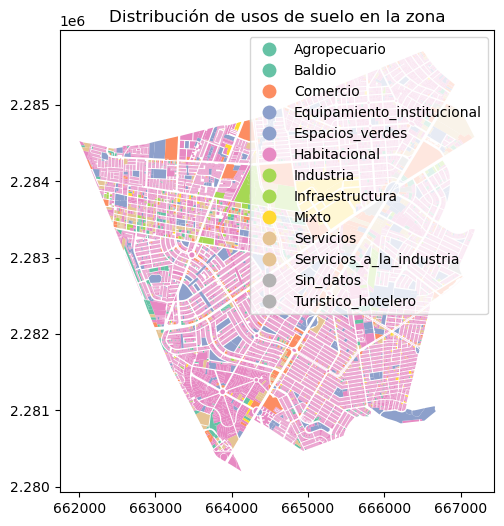

In [23]:
# Graficar los polígonos
USOS_ZONA_6.plot(column="UNUSO", legend=True, cmap="Set2", figsize=(10, 6))
plt.title("Distribución de usos de suelo en la zona")
plt.show()

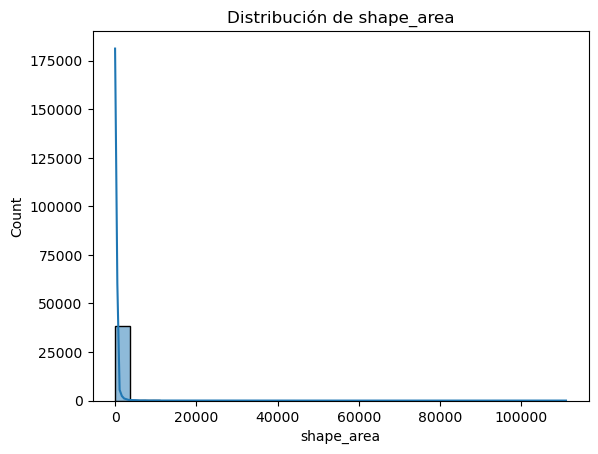

In [24]:
# Histograma de áreas
sns.histplot(USOS_ZONA_6["shape_area"], bins=30, kde=True)
plt.title("Distribución de shape_area")
plt.show()